In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)


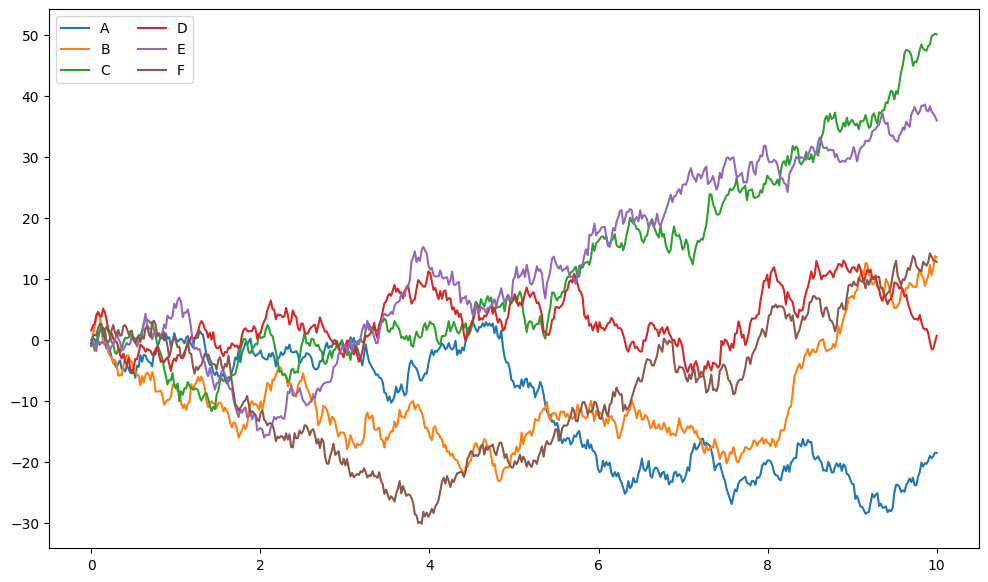

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

### Interagindo com dados


In [18]:
import requests
import pandas as pd


def get_historc_price(symbol, exchange="bitfinex", after="2018-09-01"):
    url = f"https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc"
    resp = requests.get(url, params={
        "periods": "3600",
        "after": str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()

    data = resp.json()
    df = pd.DataFrame(data["result"]["3600"], columns=[
        "CloseTime", "OpenPrince", "HighPrice", "LowPrice", "ClosePrice", "Volume", "NA"
    ])
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

In [9]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-11-23 12:47:01.956838')

In [19]:
btc = get_historc_price("btc", "bitstamp", after=last_week)

In [20]:
eth = get_historc_price("eth", "bitstamp", after=last_week)

In [21]:
# bitcoin
btc.head()

,OpenPrince,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-11-23 13:00:00,16576,16584,16475,16498,87.141994,1.439858e+06
2022-11-23 14:00:00,16492,16523,16390,16398,165.275631,2.719738e+06
2022-11-23 15:00:00,16390,16463,16343,16456,124.307186,2.040347e+06
2022-11-23 16:00:00,16459,16485,16402,16416,96.887936,1.593153e+06
2022-11-23 17:00:00,16417,16444,16331,16334,229.114389,3.757423e+06


<AxesSubplot: xlabel='CloseTime'>

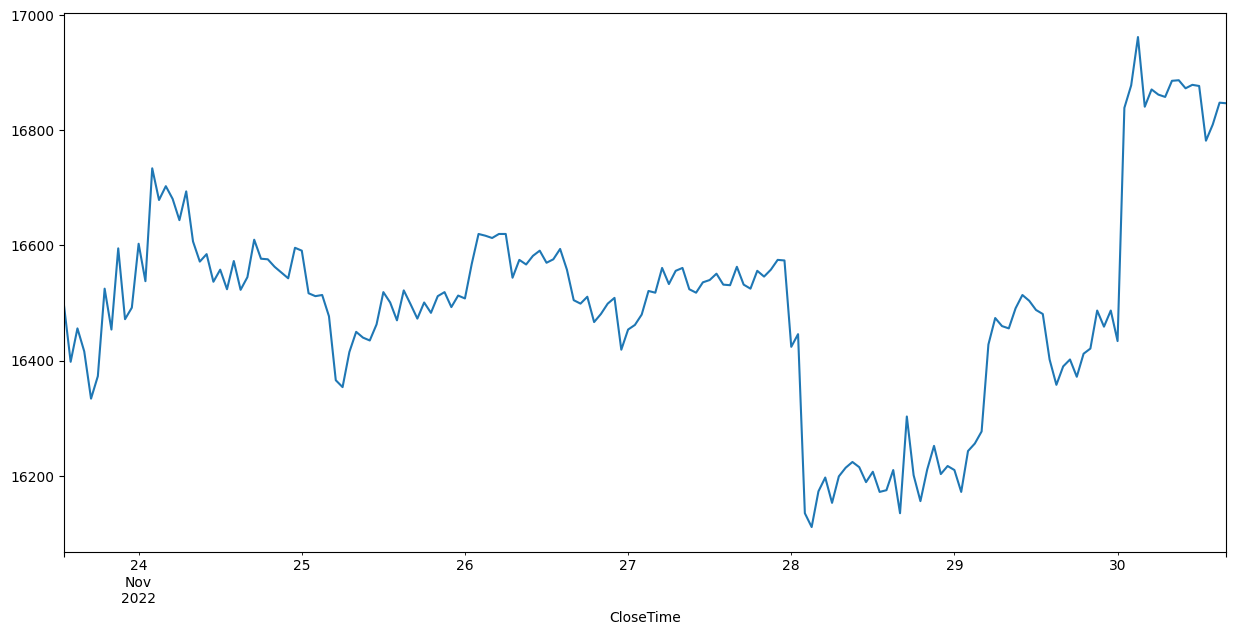

In [22]:
btc["ClosePrice"].plot(figsize=(15, 7))